In [1]:
# Load Results
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve
import numpy as np

with open('../model_evaluation_results.json', 'r') as f:
    results = json.load(f)


Model Performance Comparison:
           7-Day Model  30-Day Model
ROC-AUC            1.0           1.0
F1 Score           1.0           1.0
Precision          1.0           1.0
Recall             1.0           1.0


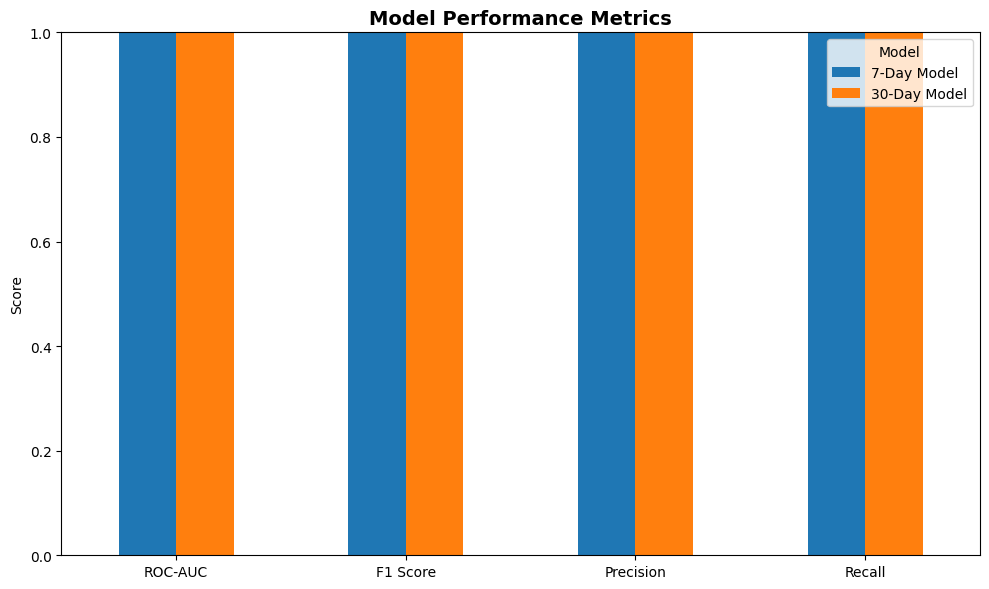

In [2]:
# Performance Metrics Comparison
metrics_df = pd.DataFrame({
    '7-Day Model': {
        'ROC-AUC': results['7day']['roc_auc'],
        'F1 Score': results['7day']['f1_score'],
        'Precision': results['7day']['precision'],
        'Recall': results['7day']['recall']
    },
    '30-Day Model': {
        'ROC-AUC': results['30day']['roc_auc'],
        'F1 Score': results['30day']['f1_score'],
        'Precision': results['30day']['precision'],
        'Recall': results['30day']['recall']
    }
})

print("Model Performance Comparison:")
print(metrics_df)

metrics_df.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Model Performance Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('../visualizations/model_performance.png', dpi=300)
plt.show()

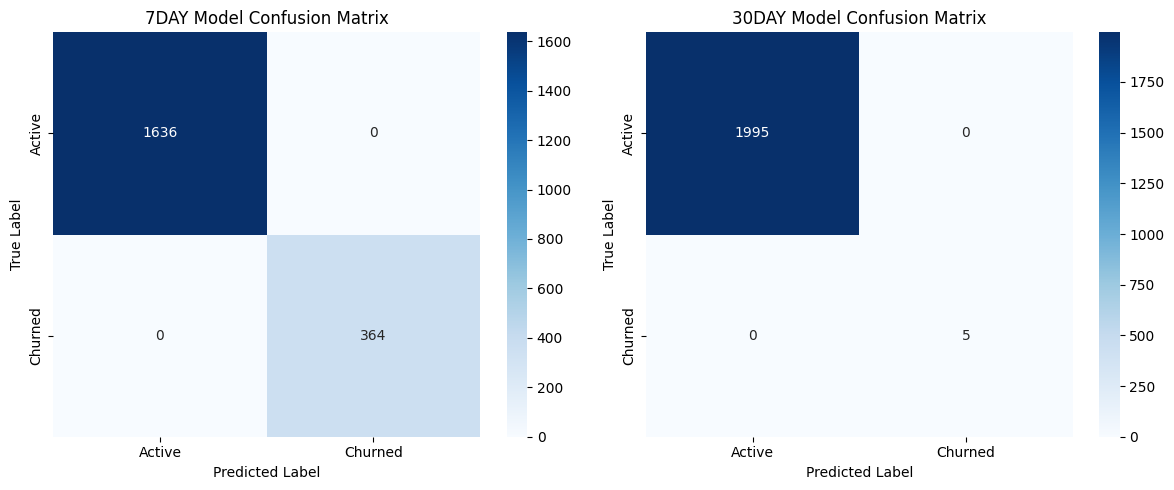

In [3]:
# Confusion Matrix Visulaiztion
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, model_name in enumerate(['7day', '30day']):
    cm = np.array(results[model_name]['confusion_matrix'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Active', 'Churned'],
                yticklabels=['Active', 'Churned'])
    axes[idx].set_title(f'{model_name.upper()} Model Confusion Matrix')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('../visualizations/confusion_matrices.png', dpi=300)
plt.show()

In [4]:
# Business Impact Summary
print("\n" + "=" * 60)
print("BUSINESS IMPACT ANALYSIS")
print("=" * 60)

for model_name in ['7day', '30day']:
    metrics = results[model_name]['business_metrics']
    print(f"\n{model_name.upper()} Model:")
    print(f"  Players Saved: {metrics['churners_saved']:.1f}")
    print(f"  Value Saved: ${metrics['value_saved']:,.2f}")
    print(f"  Campaign Cost: ${metrics['total_retention_cost']:,.2f}")
    print(f"  Net Value: ${metrics['net_value']:,.2f}")
    print(f"  ROI: {metrics['roi_percent']:.1f}%")


BUSINESS IMPACT ANALYSIS

7DAY Model:
  Players Saved: 109.2
  Value Saved: $5,460.00
  Campaign Cost: $1,820.00
  Net Value: $3,640.00
  ROI: 200.0%

30DAY Model:
  Players Saved: 1.5
  Value Saved: $75.00
  Campaign Cost: $25.00
  Net Value: $50.00
  ROI: 200.0%
